## Image Enhancement (Contrast Enhancement)

The process to enhance the visual quality of an image by manipulating its histogram (contrast) is called contrast enhancement. This process can be performed by using multiple linear or non-linear functions.

![Contrast Enhancement](dataset/imgs/contrast.png)

One of the methods to normalize and increase the quality and transparency of images in image processing is this method. if we stretch the histogram of the first image, we get a new normalized image. this will make the image clearer and brighter.
The main concept of this method is to reduce the density of tangled pixels and stretch it and make the most gray intensity of the image occur and appear and reduce its darkness because in the original image we have the accumulation of close pixels.
for calculate the new pixel in this method, we have this formula: 

**P_out=(P_in-c)((b-a)/(d-C))+a**

#### For Image Enhancement in this section we describe two methods

- Contrast stretching
- Histogram Stretching

![Contrast Enhancement](dataset/imgs/Image-Enhancement.png)

### For Example : Contrast stretching

![Contrast Enhancement](dataset/imgs/contrast-stretching-example.png)


**P_out=(P_in-c)((b-a)/(d-C))+a**

```text
P_out ∶ new pixel (normalized)
a,b∶ the range of numbers we want to normalize => (0, 255) 8-bit
c: the smallest gray scale pixel in the first image => c=10
d: the largest gray scale pixel in the first image => d=249
```

```
P0 = (249-10) * ((255-0)/(249-10))+0 = 255   
P1 = (108-10) * (1.06) = 103.88 ≈104
P2 = (110-10) * (1.06) = 106
P3 = (113-10) * (1.06) = 109.18 ≈ 109
P4 = (10-10) * (1.06) = 0
P5 = (98-10) * (1.06) = 93.28 ≈ 93
P6 = (108-10) * (1.06) = 103.88 = 104
P7 = (114-10) * (1.06) = 110.24 ≈ 110
P8 = (85-10) * (1.06) = 79.5 ≈ 80
P9 = (100-10) * (1.06) = 95.4 ≈ 95
P10 = (96-10) * (1.06) = 91.16 ≈ 91
P11 = (104-10) * (1.06) = 99.64 ≈ 100	     	  
P12 = (85-10) * (1.06) = 79.5 ≈ 80
P13 = (87-10) * (1.06) = 81.62 ≈ 82
P14 = (95-10) * (1.06) = 90.10 ≈ 90                       		
P15 = (98-10) * (1.06) = 93.28 ≈ 93
```

### New Image after contrast stretching
```text
255	104	106	109
0	93	104	110
80	95	91	100
80	82	90	93
```

### Histogram Stretching

![Histogram stretching definition](http://s10.picofile.com/file/8396260626/transformation.PNG)

## Example1: Contrast stretching

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

P_out=(P_in-c)((b-a)/(d-C))+a

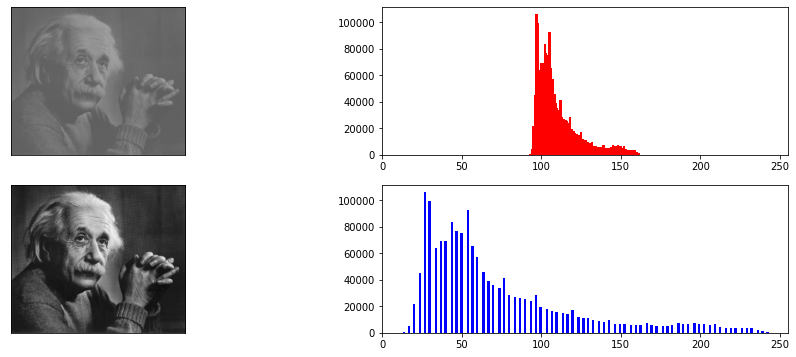

[[[62.92207792 62.92207792 62.92207792]
  [59.61038961 59.61038961 59.61038961]
  [56.2987013  56.2987013  56.2987013 ]
  ...
  [72.85714286 72.85714286 72.85714286]
  [76.16883117 76.16883117 76.16883117]
  [79.48051948 79.48051948 79.48051948]]

 [[59.61038961 59.61038961 59.61038961]
  [59.61038961 59.61038961 59.61038961]
  [56.2987013  56.2987013  56.2987013 ]
  ...
  [76.16883117 76.16883117 76.16883117]
  [79.48051948 79.48051948 79.48051948]
  [82.79220779 82.79220779 82.79220779]]

 [[56.2987013  56.2987013  56.2987013 ]
  [56.2987013  56.2987013  56.2987013 ]
  [52.98701299 52.98701299 52.98701299]
  ...
  [72.85714286 72.85714286 72.85714286]
  [76.16883117 76.16883117 76.16883117]
  [76.16883117 76.16883117 76.16883117]]

 ...

 [[46.36363636 46.36363636 46.36363636]
  [46.36363636 46.36363636 46.36363636]
  [46.36363636 46.36363636 46.36363636]
  ...
  [49.67532468 49.67532468 49.67532468]
  [52.98701299 52.98701299 52.98701299]
  [52.98701299 52.98701299 52.98701299]]

 [

In [17]:
# Compute histogram of the image
image = cv2.imread("dataset/einstein low contrast.tif")
hist_img = np.histogram(image, bins=256)

# Create the stretched image by normalizing it between 0 and L-1.
stretched_img = (255 - 0) / (np.amax(image) - np.amin(image)) * (image - np.amin(image))
hist_strch = np.histogram(stretched_img, bins=256)

# Original image ---------------------------------------------------
plt.figure(figsize=(16, 6))
plt.subplot(221), plt.xticks([]), plt.yticks([])
plt.imshow(image, cmap='gray', vmin=0, vmax=255)

plt.subplot(222), plt.xlim([0, 255])
plt.bar(hist_img[1][1:], hist_img[0], color='red', width=1.5)

# Stretched image ---------------------------------------------------
plt.subplot(223), plt.xticks([]), plt.yticks([])
plt.imshow(stretched_img.astype('uint8'), cmap='gray', vmin=0, vmax=255)

plt.subplot(224), plt.xlim([0, 255])
plt.bar(hist_strch[1][1:], hist_strch[0], color='blue', width=1.5)

plt.show()

print(stretched_img)

## Example2: Contrast stretching

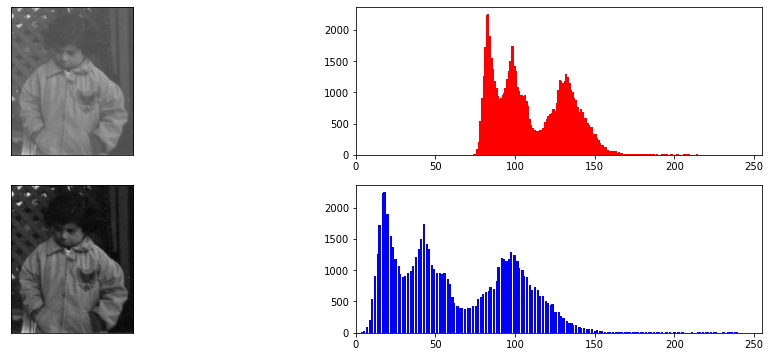

[[58.47133758 61.71974522 61.71974522 ... 21.11464968 21.11464968
  19.49044586]
 [56.84713376 60.0955414  61.71974522 ... 21.11464968 21.11464968
  19.49044586]
 [53.59872611 58.47133758 60.0955414  ... 21.11464968 19.49044586
  19.49044586]
 ...
 [43.85350318 40.60509554 40.60509554 ... 14.61783439 16.24203822
  17.86624204]
 [45.47770701 40.60509554 40.60509554 ... 22.7388535  24.36305732
  27.61146497]
 [45.47770701 40.60509554 40.60509554 ... 34.10828025 35.73248408
  37.3566879 ]]


In [20]:
# Compute histogram of the image
image = cv2.imread("dataset/pout.jpg", 0)
hist_img = np.histogram(image, bins=256)

# Create the stretched image by normalizing it between 0 and L-1.
stretched = 255 / (np.amax(image) - np.amin(image)) * (image - np.amin(image))
hist_strch = np.histogram(stretched, bins=256)

# Original image ---------------------------------------------------
plt.figure(figsize=(16, 6))
plt.subplot(221), plt.xticks([]), plt.yticks([])
plt.imshow(image, cmap='gray', vmin=0, vmax=255)

plt.subplot(222), plt.xlim([0, 255])
plt.bar(hist_img[1][1:], hist_img[0], color='red', width=1.5)

# Stretched image ---------------------------------------------------
plt.subplot(223), plt.xticks([]), plt.yticks([])
plt.imshow(stretched, cmap='gray', vmin=0, vmax=255)

plt.subplot(224), plt.xlim([0, 255])
plt.bar(hist_strch[1][1:], hist_strch[0], color='blue', width=1.5)

plt.show()

print(stretched)

# Histogram Equalization
Histogram equalization is a method to process images in order to adjust the contrast of an image by modifying the intensity distribution of the histogram. The objective of this technique is to give a linear trend to the cumulative probability function associated to the image.

The processing of histogram equalization relies on the use of the cumulative probability function (cdf). The cdf is a cumulative sum of all the probabilities lying in its domain and defined by:

![Histogram Equalization](dataset/imgs/histeq1.png)
![Histogram Equalization](dataset/imgs/histeq.png)


# For Example

In both contrast stretching and histogram equalization, the objective is to spread the gray levels over the entire allowable gray level range. While stretching is a linear process and is reversible, equalization is a nonlinear process and is irreversible. Histogram equalization tries to redistribute about the same number of pixels for each gray level and it is automatic. Consider the 4 × 4 4-bit image shown in Table 2.4 (left). The gray levels are in the range 0–15. 

![Histogram Equalization](dataset/imgs/histeq3.png)

Apply the Histogram Equalization on the above image.

![Histogram Equalization](dataset/imgs/histeq4.png)

New Image (after histogram equalization)

```
9	11	3	11
8	3	5	7
15	15	4	15
15	6	9	1
```


In [41]:
mri_img = cv2.imread('dataset/MRI-spine1.tif', 0)
cameraman_img = cv2.imread('dataset/cameraman.tif', 0)
pout_img = cv2.imread('dataset/pout.jpg', 0)

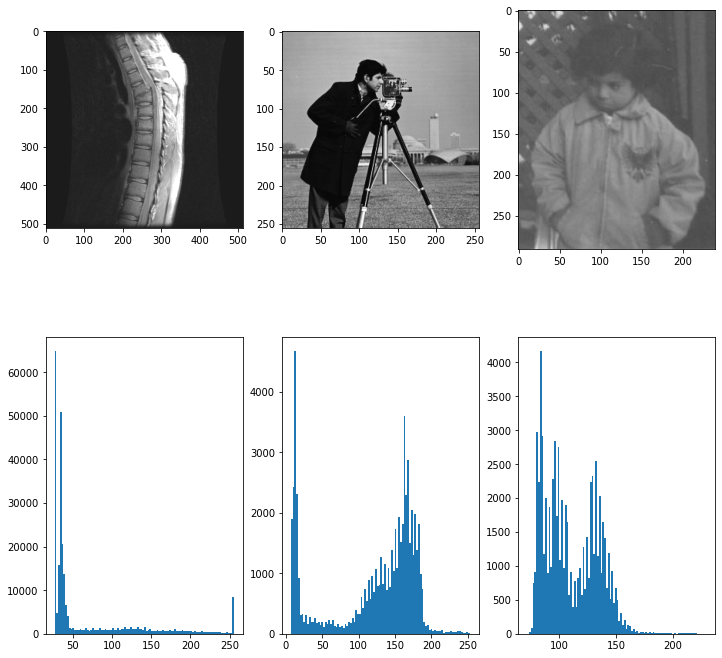

In [42]:
plt.figure(figsize=(12, 12))

plt.subplot(231), plt.imshow(mri_img, cmap='gray', vmin=0, vmax=255)
plt.subplot(234), plt.hist(mri_img.ravel(), bins=100)

plt.subplot(232), plt.imshow(cameraman_img, cmap='gray', vmin=0, vmax=255)
plt.subplot(235), plt.hist(cameraman_img.ravel(), bins=100)

plt.subplot(233), plt.imshow(pout_img, cmap='gray', vmin=0, vmax=255)
plt.subplot(236), plt.hist(pout_img.ravel(), bins=100)

plt.show()

In [43]:
def histogramEqualization(f, bins=100):
    his, be = np.histogram(f, bins=bins)
    his = his.astype(float)/sum(his)
    return np.interp(f, be, np.hstack((np.zeros((1)), np.cumsum(his))))

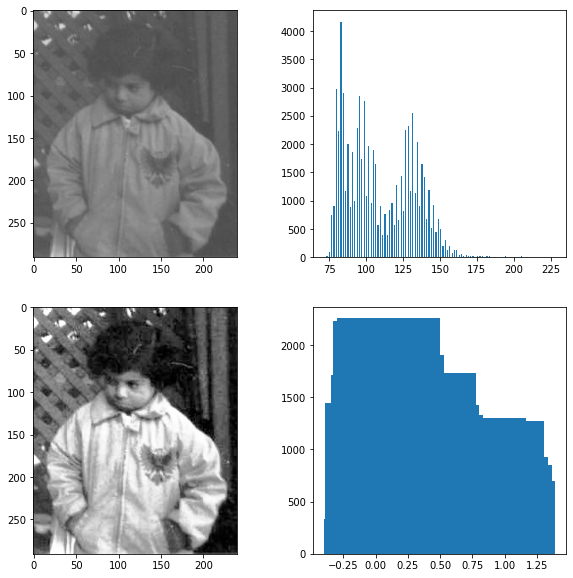

In [44]:
image = pout_img

plt.figure(figsize=(10, 10))

plt.subplot(221), plt.imshow(image, cmap='gray', vmin=0, vmax=255)
histo, range = np.histogram(image, bins=100)
plt.subplot(222), plt.bar(range[:-1], histo)

Eq = histogramEqualization(image)
plt.subplot(223), plt.imshow(Eq, cmap='gray')
histo, range = np.histogram(Eq, bins=100)
plt.subplot(224), plt.bar(range[:-1], histo)

plt.show()

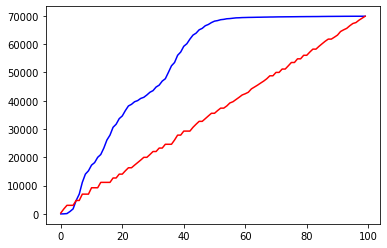

In [46]:
image = pout_img
histo, range = np.histogram(image, bins=100)
cdf_1 = np.cumsum(histo)

Eq = histogramEqualization(image)
histo, range = np.histogram(Eq, bins=100)
cdf_2 = np.cumsum(histo)

plt.figure()
plt.plot(cdf_1, 'b')
plt.plot(cdf_2, 'r')
plt.show()

### skimage.exposure.equalize_hist()

We can use this function to calculate Histogram Equalization


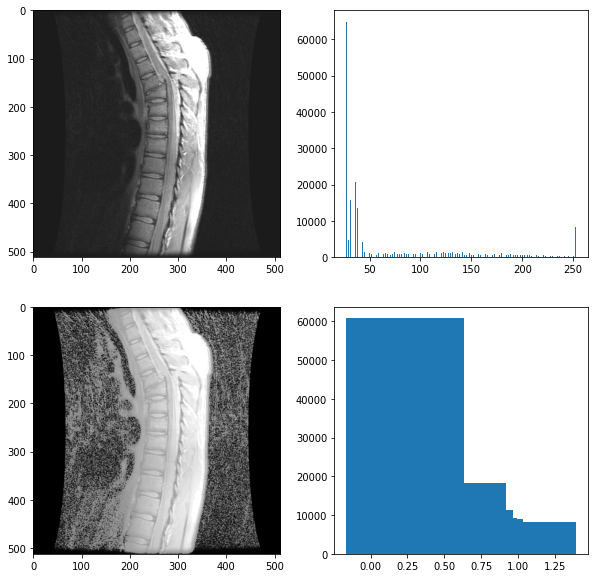

In [48]:
from skimage import exposure


img = cv2.imread('dataset/MRI-spine1.tif', 0)
plt.figure(figsize=(10, 10))

plt.subplot(221), plt.imshow(img, cmap='gray', vmin=0, vmax=255)
histo, range = np.histogram(img, bins=100)
plt.subplot(222), plt.bar(range[:-1], histo)
# Equalization
Eq = exposure.equalize_hist(img)
plt.subplot(223), plt.imshow(Eq, cmap='gray')
histo, range = np.histogram(Eq, bins=100)
plt.subplot(224), plt.bar(range[:-1], histo)

plt.show()